In [1]:
import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

import warnings

warnings.filterwarnings('ignore')
#Sample_Size
sample_size=2000

#Z_Critical Score
z_critical = stats.norm.ppf(q = 0.95)  

# Critical Value
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1



In [5]:
data=pd.read_csv('cleaned_loan_data.csv')
data.head(10)

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes
5,LA006,Yes,credit_card,7.88%,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,Less than 5,No,Yes
6,LA007,Yes,debt_consolidation,14.96%,194.02,10.714418,4.00,667,3180.041667,3839,76.8,1,Less than 5,No,No
7,LA008,Yes,all_other,11.14%,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,Less than 5,No,No
8,LA009,Yes,home_improvement,11.34%,87.19,11.407565,17.25,682,3989.000000,69909,51.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        9578 non-null   object 
 1   credit.policy      9578 non-null   object 
 2   purpose            9578 non-null   object 
 3   int.rate           9578 non-null   object 
 4   installment        9578 non-null   float64
 5   log.annual.inc     9578 non-null   float64
 6   dti                9578 non-null   float64
 7   fico               9578 non-null   int64  
 8   days.with.cr.line  9578 non-null   float64
 9   revol.bal          9578 non-null   int64  
 10  revol.util         9578 non-null   float64
 11  pub.rec            9578 non-null   int64  
 12  inq.last.6mths     9578 non-null   object 
 13  delinq.2yrs        9578 non-null   object 
 14  paid.back.loan     9578 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 1.1+ MB


In [3]:
data_sample = data.sample(n=sample_size, random_state=0)

In [4]:
sample_mean = data_sample['installment'].mean()

sample_std = data_sample['installment'].std()

margin_of_error = z_critical*(sample_std/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence Interval:") 
print(confidence_interval)                      

true_mean = data['installment'].mean()    
print("True mean is {}".format(true_mean))

Confidence Interval:
(309.97359170012027, 325.24833829987966)
True mean is 319.08941323867265


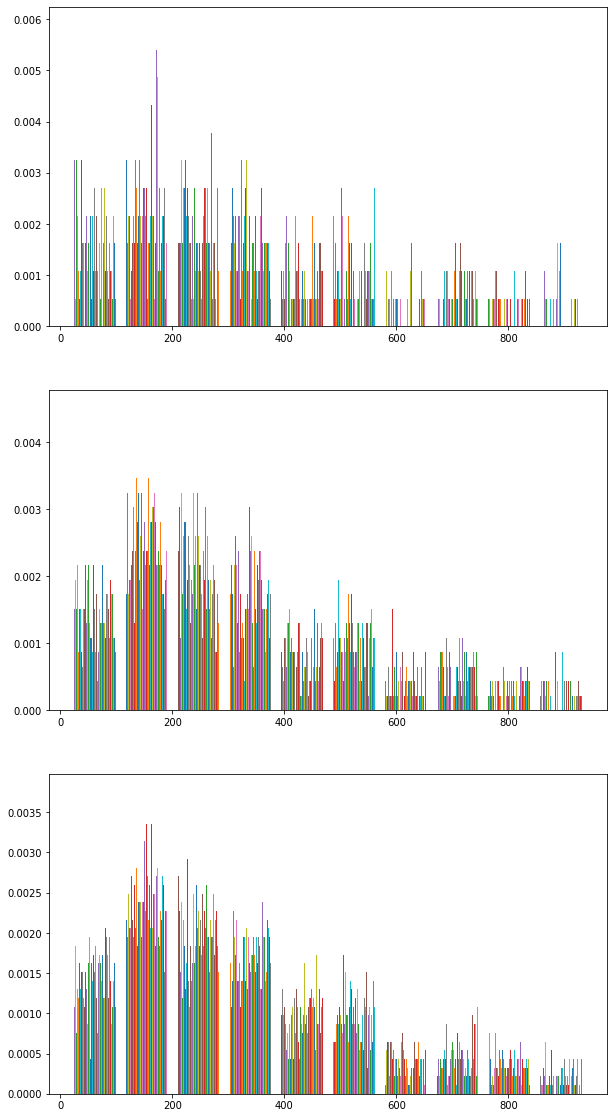

In [7]:
#CLT
sample_size  = np.array([20,50,100])

fig,axes = plt.subplots(3,1, figsize=(10,20))
 
for i in range(len(sample_size)):

    m =[]

    for j in range(1000):

        mean = data['installment'].sample(sample_size[i])

        m.append(mean)

    mean_series=pd.Series(m) 
    axes[i].hist(mean_series, normed=True)


plt.show()  

In [8]:
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

data['int.rate'] = data['int.rate'].astype(float)/100

z_statistic_1, p_value_1 = ztest(x1=data[data['purpose']=='small_business']['int.rate'], value=data['int.rate'].mean(), alternative='larger')

print(('Z-statistic 1 is :{}'.format(z_statistic_1)))
print(('P-value 1 is:{}'.format(p_value_1)))

Z-statistic 1 is :12.321276240201554
P-value 1 is:3.479213190639132e-35


In [9]:
#Applying ztest for the hypothesis
z_statistic_2, p_value_2 = ztest(x1=data[data['paid.back.loan']=='No']['installment'], x2=data[data['paid.back.loan']=='Yes']['installment'])

print(('Z-statistic 2 is :{}'.format(z_statistic_2)))
print(('P-value 2 is :{}'.format(p_value_2)))

Z-statistic 2 is :4.894575287952092
P-value 2 is :9.85182562491764e-07


In [10]:
#Task 5: Purpose vs Loan Defaulting

#Critical value 
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 6)   # Df = number of variable categories(in purpose) - 1

#Code starts here


# Subsetting the dataframe
yes=data[data['paid.back.loan']=='Yes']['purpose'].value_counts()
no=data[data['paid.back.loan']=='No']['purpose'].value_counts()


#Concating yes and no into a single dataframe
observed=pd.concat([yes.transpose(),no.transpose()], 1,keys=['Yes','No'])

print(observed)

chi2, p, dof, ex = chi2_contingency(observed)


print("Critical value")
print(critical_value)


print("Chi Statistic")
print(chi2)

#Code ends here


                     Yes   No
debt_consolidation  3354  603
all_other           1944  387
credit_card         1116  146
home_improvement     522  107
small_business       447  172
major_purchase       388   49
educational          274   69
Critical value
12.591587243743977
Chi Statistic
96.98469589063261
